In [2]:
from simulation_funcs import gillespie_draw, gillespie_ssa, simple_propensity, simple_update
import bokeh
import tqdm
import numpy as np
import bokeh.plotting as bp
from bokeh.io import show, output_notebook
from bokeh.models import Span
import matplotlib.pyplot as plt 

size = 10 # amount of simulations per run
beta_vals = np.linspace(0, 15, 50) # beta values to test
average_damages = np.zeros((len(beta_vals), size))

for j, beta_mrna in enumerate(beta_vals):
    # Specify parameters for calculation
    beta_mrna =  beta_mrna # transcription rate
    gamma_mrna = 0.1 # degradation rate
    u = 1.0 # damage accumulation rate
    Pd = 0.5 # rate of damage detection. must be between 0 and 1
    gene_on = 0.8
    gene_off = 1 - gene_on

    args = (beta_mrna, gamma_mrna, u, Pd, gene_on, gene_off)
    time_points = np.linspace(0, 500, 1001)
    population_0 = np.array([0, 0, 0, 0], dtype=int) # starting with 0 population in everything and gene OFF

    # Seed random number generator for reproducibility
    np.random.seed(42)

    # Initialize output array
    samples = np.empty((size, len(time_points), 4), dtype=int) # again, change the number here to the amount of things we are tracking

    # shape of samples is (size, time_points, amount of species)
    # size = amount of times simulation is run
    # time_points = amount of time points in each simulation
    # amount of species = how many things we are tracking, mRNA, amount of damage on gene, etc.

    # Run the calculations
    for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar
        # this is storing the population at each time point for each simulation being ran (i)
        samples[i,:,:] = gillespie_ssa(simple_propensity, simple_update,
                                    population_0, time_points, args=args)
        #average_damages.append(samples[i,:,2].mean(axis=1)) # getting 
    average_damages[j] = samples[:, :, 2].mean(axis=1) # getting the average damage over every simulation


C:\Users\joeot\AppData\Local\Temp\ipykernel_22496\4206568078.py:39: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0, 0.5, 'Average Damage over 1000 time units of 10 simulation')

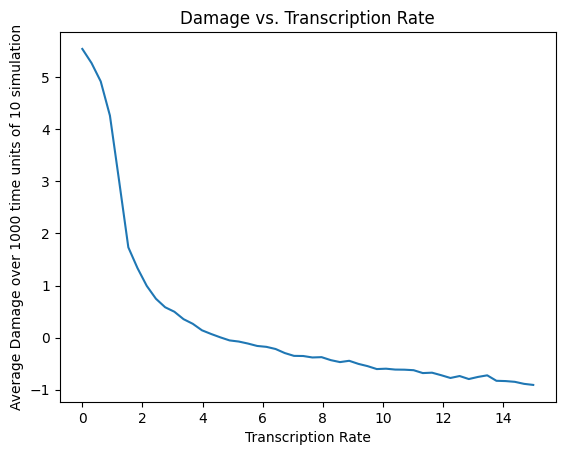

In [3]:
np.shape(average_damages)
damages = average_damages.mean(axis=1)
plt.plot(beta_vals, np.log(damages))
plt.title('Damage vs. Transcription Rate')
plt.xlabel('Transcription Rate')
plt.ylabel('Average Damage over 1000 time units of 10 simulation')

In [4]:
from simulation_funcs import gillespie_draw, gillespie_ssa, simple_propensity, simple_update
import bokeh
import tqdm
import numpy as np
import bokeh.plotting as bp
from bokeh.io import show, output_notebook
from bokeh.models import Span
import matplotlib.pyplot as plt 

size = 10 # amount of simulations per run
Pd_vals = np.linspace(0, 1, 50) # beta values to test
average_damages = np.zeros((len(Pd_vals), size))

for j, Pd_val in enumerate(Pd_vals):
    # Specify parameters for calculation
    beta_mrna =  5.0 # transcription rate
    gamma_mrna = 0.1 # degradation rate
    u = 1.0 # damage accumulation rate
    Pd = Pd_val # rate of damage detection. must be between 0 and 1
    gene_on = 0.8
    gene_off = 1 - gene_on

    args = (beta_mrna, gamma_mrna, u, Pd, gene_on, gene_off)
    time_points = np.linspace(0, 500, 1001)
    population_0 = np.array([0, 0, 0, 0], dtype=int) # starting with 0 population in everything and gene OFF

    # Seed random number generator for reproducibility
    np.random.seed(42)

    # Initialize output array
    samples = np.empty((size, len(time_points), 4), dtype=int) # again, change the number here to the amount of things we are tracking

    # shape of samples is (size, time_points, amount of species)
    # size = amount of times simulation is run
    # time_points = amount of time points in each simulation
    # amount of species = how many things we are tracking, mRNA, amount of damage on gene, etc.

    # Run the calculations
    for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar
        # this is storing the population at each time point for each simulation being ran (i)
        samples[i,:,:] = gillespie_ssa(simple_propensity, simple_update,
                                    population_0, time_points, args=args)
        #average_damages.append(samples[i,:,2].mean(axis=1)) # getting 
    average_damages[j] = samples[:, :, 2].mean(axis=1) # getting the average damage over every simulation


C:\Users\joeot\AppData\Local\Temp\ipykernel_22496\2957572328.py:39: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

# Repair Rate vs. Number of Damage Sites

Text(0, 0.5, 'Average Damage over 1000 time units of 10 simulations')

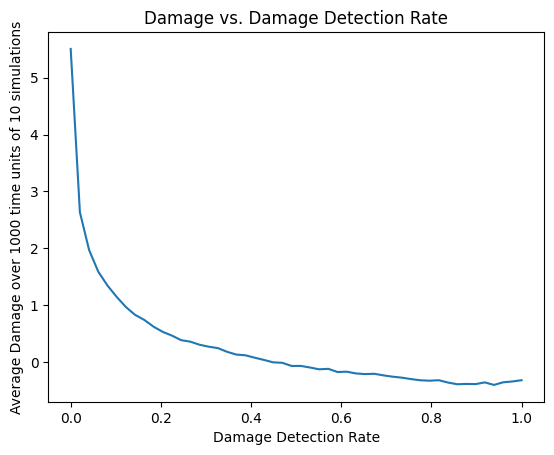

In [5]:
np.shape(average_damages)
damages = average_damages.mean(axis=1)
plt.plot(Pd_vals, np.log(damages))
plt.title('Damage vs. Damage Detection Rate')
plt.xlabel('Damage Detection Rate')
plt.ylabel('Average Damage over 1000 time units of 10 simulations')

# Expected Drift

I'm not too sure about this but it seems you can get the average expected value of what the system will do, whether damage accumulate or not by doing 
$$ \frac{d}{dt} E[D(t+dt) - D(t)] = u - \beta_m(1-(1-P_d)^d) $$

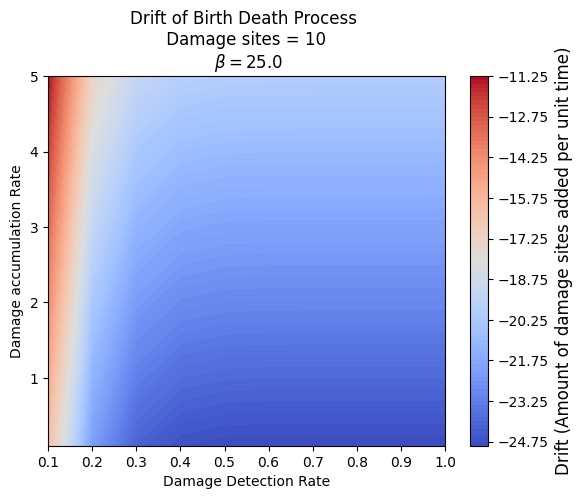

In [12]:
# contour plots for different amounts of damages I guess?
# I am going to fix Beta_m and d but change u and P_d

beta_m = 25.0
D = 10

u_s = np.linspace(0.1, 5.0, 10)
Pd_s = np.linspace(0.1, 1.0, 10)

uu, Pd_Pd = np.meshgrid(u_s, Pd_s)
z = uu - beta_m*(1-(1-Pd_Pd)**D) # Drift

plt.contourf(Pd_Pd, uu, z, cmap='coolwarm', levels=1000)
plt.title(f'Drift of Birth Death Process \n Damage sites = {D} \n $\\beta = {beta_m}$')
plt.xlabel('Damage Detection Rate')
plt.ylabel('Damage accumulation Rate')

contour = plt.contourf(Pd_Pd, uu, z, levels=100, cmap='coolwarm')

drift0 = plt.contour(Pd_Pd, uu, z, levels=[0], colors='black', linewidths=0.5)


plt.clabel(drift0, fmt="Drift$=0$", inline=True, fontsize=9)
cbar = plt.colorbar(contour)
cbar.set_label('Drift (Amount of damage sites added per unit time)', fontsize=12)


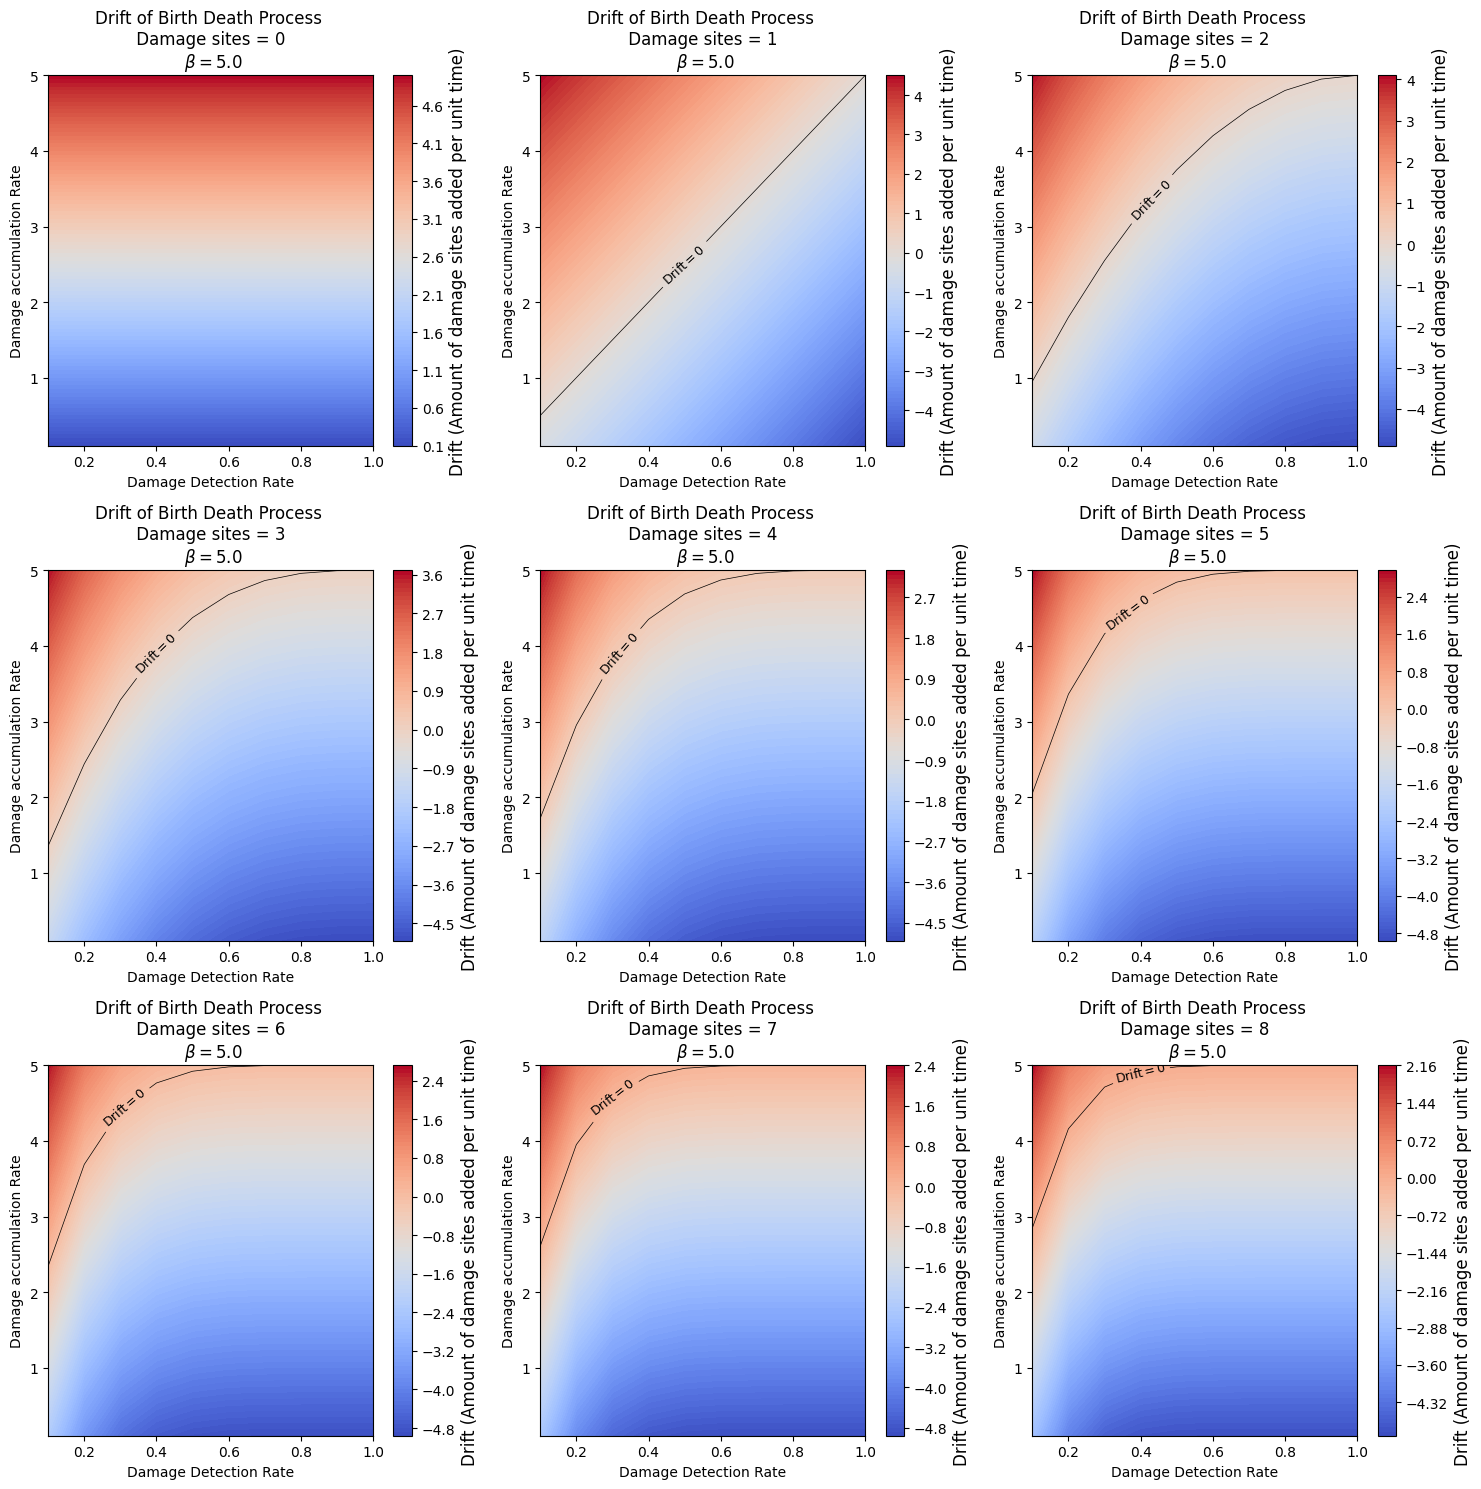

In [60]:
# contour plots for different amounts of damages I guess?
# I am going to fix Beta_m and d but change u and P_d

beta_m = 5.0
Ds = range(9)

u_s = np.linspace(0.1, 5.0, 10)
Pd_s = np.linspace(0.1, 1.0, 10)

uu, Pd_Pd = np.meshgrid(u_s, Pd_s)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
axes = axes.flatten()

for i, D in enumerate(Ds):
    z = uu - beta_m*(1-(1-Pd_Pd)**D) # Drift

    axes[i].contourf(Pd_Pd, uu, z, cmap='coolwarm', levels=1000)
    axes[i].set_title(f'Drift of Birth Death Process \n Damage sites = {D} \n $\\beta = {beta_m}$')
    axes[i].set_xlabel('Damage Detection Rate')
    axes[i].set_ylabel('Damage accumulation Rate')

    contour = axes[i].contourf(Pd_Pd, uu, z, levels=100, cmap='coolwarm')

    drift0 = axes[i].contour(Pd_Pd, uu, z, levels=[0], colors='black', linewidths=0.5)


    axes[i].clabel(drift0, fmt="Drift$=0$", inline=True, fontsize=9)
    cbar = plt.colorbar(contour)
    cbar.set_label('Drift (Amount of damage sites added per unit time)', fontsize=12)
plt.tight_layout()

# Link back with classic birth death models

$ (1-P_d)^d \approx 1-d*P_d $ this will be true only in the case of small d, so could keep damage detection high/restrict d to a low value to try and show that when this is the case, we get a classic birth death model.